# **CARACTERIZAÇÃO DAS CIDADES DO ESTADO DE SÃO PAULO COM MAIORES TAXAS DE PREVALÊNCIA DE CASOS DE DENGUE**

## Imports and Pip Install

In [11]:
!pip install geopandas
!pip install mapclassify


In [12]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import mapclassify


##Importação de Arquivos

In [13]:
# drive.mount('/content/drive')

# #Arquivos sobre dengue e Shape de Municipios
# municipios = pd.read_csv('/content/drive/Shared drives/TCC/Dados/TotalPopulacaoEstadoSPPorMunicipio.csv',sep=";")
# estados = pd.read_csv('/content/drive/Shared drives/TCC/Dados/TotalPopulacaoPorEstado.csv',sep=";")
# df = pd.read_csv('/content/drive/Shared drives/TCC/DBF DENGUE Final/Dengue.csv', sep=";")
# uf = pd.read_csv('/content/drive/Shared drives/TCC/Dados/Tabela Estados IBGE.csv', sep=";")
# sp = gpd.read_file('/content/drive/Shared drives/TCC/Dados/ArquivosParaGeoPandasEstadoSP/35MUE250GC_SIR.shp')

In [14]:
# Arquivos de Caracterizacao dos municipios top5 do estado de SP

# escolaridade = pd.read_csv('/content/drive/Shared drives/TCC/IDHM/EscolaridadeAtlasBrasil.csv',sep=",", decimal=',')
# habitacao = pd.read_csv('/content/drive/Shared drives/TCC/IDHM/HabitacaoAtlasBrasil.csv',sep=",",decimal=',')
# pop_feminina = pd.read_csv('/content/drive/Shared drives/TCC/IDHM/PopulacaoFemininaAtlasBrasil.csv',sep=",")
# pop_masculina = pd.read_csv('/content/drive/Shared drives/TCC/IDHM/PopulacaoMasculinaAtlasBrasil.csv',sep=",")
# pop_total = pd.read_csv('/content/drive/Shared drives/TCC/IDHM/PopulacaoTotalAtlasBrasil.csv',sep=",")
# renda = pd.read_csv('/content/drive/Shared drives/TCC/IDHM/RendaAtlasBrasil.csv',sep=",",decimal=',')

In [15]:
# ARQUIVOS GITHUB

# Arquivos Sobre dengue e Shape de Municipios
municipios = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/TotalPopulacaoEstadoSPPorMunicipio.csv',sep=";")
estados = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/TotalPopulacaoPorEstado.csv',sep=";")
df = pd.read_csv('https://media.githubusercontent.com/media/rgaldi/ArquivoDengue/master/Dengue.csv', sep=";")
uf = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/Tabela%20Estados%20IBGE.csv', sep=";")
sp = gpd.read_file('COLAR O PATH AQUI DO ARQUIVO SHAPE FILE')

#Arquivos de Caracterizacao dos municipios top5 do estado de SP

escolaridade = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/EscolaridadeAtlasBrasil.csv',sep=",", decimal=',')
habitacao = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/HabitacaoAtlasBrasil.csv',sep=",",decimal=',')
pop_feminina = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/PopulacaoFemininaAtlasBrasil.csv',sep=",")
pop_masculina = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/PopulacaoMasculinaAtlasBrasil.csv',sep=",")
pop_total = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/PopulacaoTotalAtlasBrasil.csv',sep=",")
renda = pd.read_csv('https://raw.githubusercontent.com/migueelcruz/DataScience_Dengue/master/Utilitarios/RendaAtlasBrasil.csv',sep=",",decimal=',')

##Tratamento de Dados Global

In [16]:
df.drop(['Unnamed: 33'], axis= 1 ,inplace=True)

obitos_2018 = df.query("dt_obito < '2019-01-01'").index
df.drop(obitos_2018, inplace=True)

In [17]:
notific_2018 = df.query("dt_notific < '2019-01-01'").index
df.drop(notific_2018, inplace=True)

In [18]:
#Para visualizar, descomentar a linha abaixo
#df

# Gráfico de Quantidade de Casos por Gênero

Text(0, 0.5, 'Quantidade')

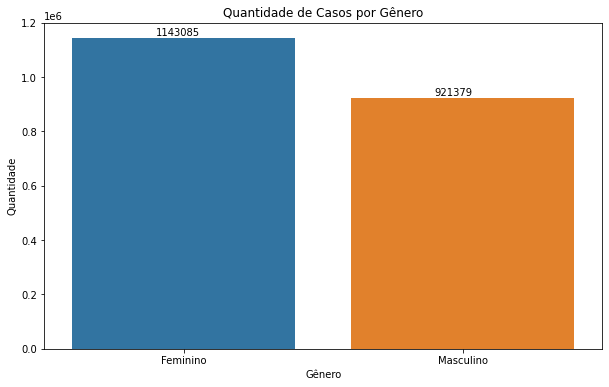

In [19]:
contagem_sexo = df["cs_sexo"].value_counts().to_frame().reset_index()
contagem_sexo.columns = ["Sexo", "Total"]

contagem_sexo = contagem_sexo.query('Sexo in ["M","F"]')

contagem_sexo

plt.figure(figsize=(10,6))
g = sns.barplot(x='Sexo', y='Total', data=contagem_sexo)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.3, p.get_height()+10000))

g.set_title('Quantidade de Casos por Gênero')
g.set_xlabel('Gênero')
g.set_xticklabels(['Feminino', 'Masculino'])
g.set_ylabel('Quantidade')

# Qual período do ano teve mais casos mortais de dengue:

Text(0.5, 0, 'Mês do Óbito')

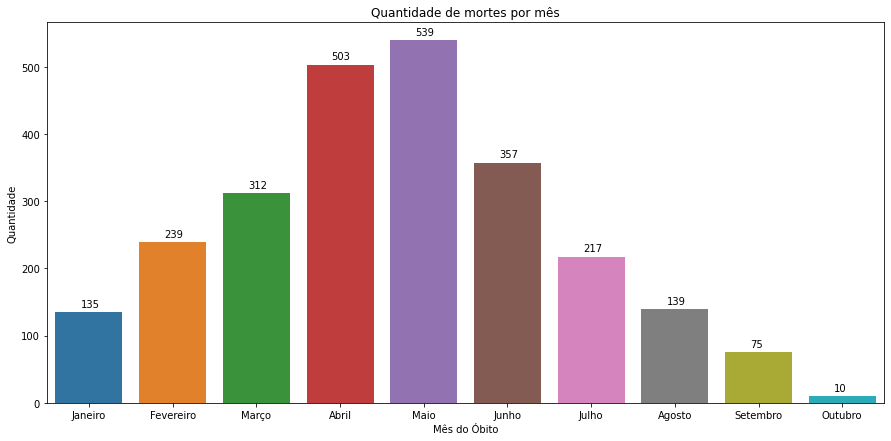

In [20]:
#Tratamento de Dados

obitos = pd.DataFrame(df, columns= ['cs_sexo', 'dt_obito'])
quantidade_obitos_correto = obitos.apply(lambda x: x.replace('None', np.nan))
quantidade_obitos_correto.dropna(inplace=True)
quantidade_obitos_correto.reset_index()
quantidade_obitos_correto['dt_obito'] = pd.to_datetime(quantidade_obitos_correto['dt_obito'], format='%Y-%m-%d')
quantidade_obitos_correto['mes_obito'] = quantidade_obitos_correto['dt_obito'].dt.strftime('%B')

#Final do Tratamento

#Inicio Plot

ordem = ["January", "February","March","April","May","June","July", "August", "September", "October"]

plt.figure(figsize=(15,7))
g = sns.countplot(x="mes_obito", order=ordem ,data=quantidade_obitos_correto)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.3, p.get_height()+8))

g.set_xticklabels(["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"])
g.set_title('Quantidade de mortes por mês')
g.set_ylabel("Quantidade")
g.set_xlabel("Mês do Óbito")

#Final plot




In [21]:
obitos = pd.DataFrame(df, columns= ['cs_sexo', 'dt_obito'])
quantidade_obitos_correto = obitos.apply(lambda x: x.replace('None', np.nan))
quantidade_obitos_correto.dropna(inplace=True)
quantidade_obitos_correto.columns = ['Sexo', 'Data_Obito']
quantidade_obitos_correto.reset_index()

,index,Sexo,Data_Obito
0,2696,M,2019-08-05
1,3473,M,2019-04-28
2,5397,M,2019-02-26
3,5596,M,2019-04-20
4,9255,M,2019-08-01
...,...,...,...
2521,2067074,F,2019-05-16
2522,2067107,F,2019-05-21
2523,2067978,F,2019-06-22
2524,2068122,M,2019-06-13


# Qual período do ano teve mais casos de dengue:

Text(0.5, 0, 'Mês do Caso')

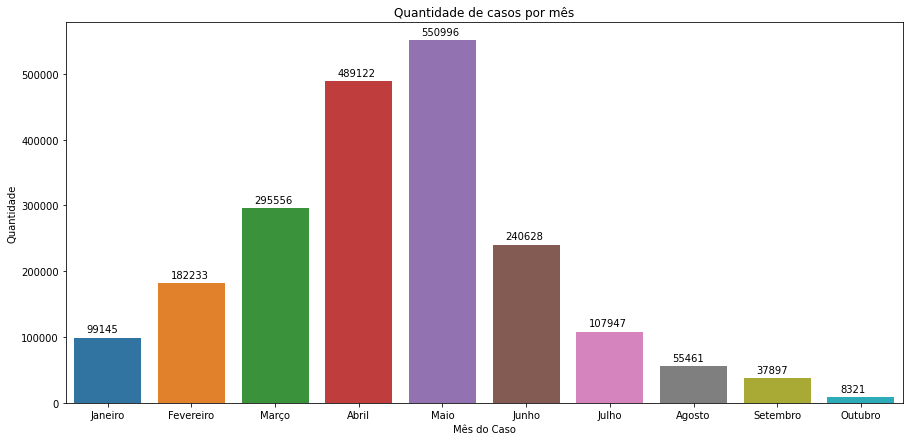

In [22]:
#Tratamento de Dados
notificacoes = pd.DataFrame(df, columns=['dt_notific','nu_notific'])
notificacoes.reset_index()
notificacoes['dt_notific'] = pd.to_datetime(notificacoes['dt_notific'], format='%Y-%m-%d')
notificacoes['mes_notific'] = notificacoes['dt_notific'].dt.strftime('%B')

#Fianl Tratamento de dados

#Inicio Plot
ordem = ["January", "February","March","April","May","June","July", "August", "September", "October"]

plt.figure(figsize=(15,7))
g = sns.countplot(x="mes_notific", order=ordem ,data=notificacoes)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.15, p.get_height()+8000))

g.set_xticklabels(["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"])
g.set_title('Quantidade de casos por mês')
g.set_ylabel("Quantidade")
g.set_xlabel("Mês do Caso")

#Final Plot


# Qual proporção da mortalidade entre homens e mulheres:


Text(0, 0.5, 'Quantidade')

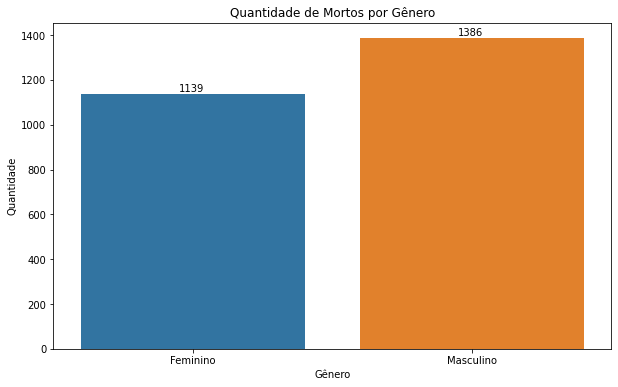

In [23]:
#Tratamento de Dados

obitos_por_genero = pd.DataFrame(df, columns= ['cs_sexo', 'dt_obito'])
obitos_por_genero = obitos_por_genero.apply(lambda x: x.replace('None', np.nan))
obitos_por_genero.dropna(inplace=True)
obitos_por_genero = obitos_por_genero.reset_index()
obitos_por_genero.drop(['index'], axis= 1 ,inplace=True)
obitos_por_genero.drop(['dt_obito'], axis= 1 ,inplace=True)

obitos_por_genero = obitos_por_genero.query('cs_sexo in ["M","F"]')

obitos_por_genero = obitos_por_genero["cs_sexo"].value_counts().to_frame().reset_index()
obitos_por_genero = obitos_por_genero.sort_values(by='cs_sexo')
obitos_por_genero.columns = ["Sexo", "Total"]

#Plot 
plt.figure(figsize=(10,6))
g = sns.barplot(x='Sexo', y='Total', data=obitos_por_genero)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.35, p.get_height()+10))

g.set_title('Quantidade de Mortos por Gênero')
g.set_xticklabels(['Feminino', 'Masculino'])
g.set_xlabel('Gênero')
g.set_ylabel('Quantidade')


# Quais os Sinais Clinicos foram mais comum nos casos de dengue notificados:

<Figure size 1440x2160 with 0 Axes>

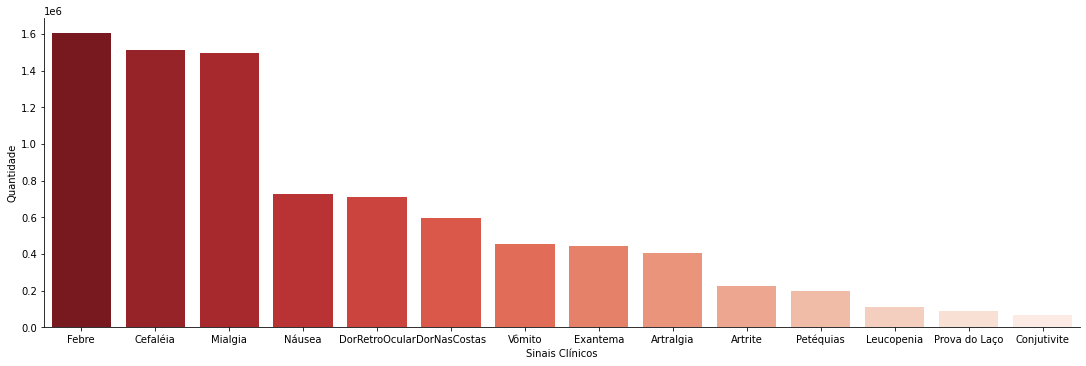

In [24]:
#Tratamento de Dados
sinais_clinicos = pd.DataFrame(df, columns= ['febre', 'mialgia', 'cefaleia',	'exantema',	'vomito',	'nausea',	'dor_costas',	'conjuntvit',	'artrite', 'artralgia',	'petequia_n',	'leucopenia',	'laco',	'dor_retro'])
sinais_clinicos = sinais_clinicos.apply(lambda x: x.replace(np.nan, 2.0))
sinais_clinicos = sinais_clinicos.apply(lambda x: x.replace(2.0, 0))

sinais_clinicos = sinais_clinicos.sum().to_frame().reset_index()
sinais_clinicos.columns = ['sinais_clinicos', 'total']
sinais_clinicos = sinais_clinicos.sort_values(['total'], ascending=False)

#Final Tratamento de Dados

plt.figure(figsize=(20,30))

g = sns.catplot(x= "sinais_clinicos", y='total', data = sinais_clinicos, kind='bar', aspect=3, palette='Reds_r')

g.set_xticklabels(["Febre", "Cefaléia","Mialgia", "Náusea", "DorRetroOcular", "DorNasCostas", "Vômito", 
            "Exantema", "Artralgia", "Artrite", "Petéquias", "Leucopenia", "Prova do Laço", "Conjutivite"])

g.set_xlabels("Sinais Clínicos")
g.set_ylabels("Quantidade")





# Qual a faixa etária onde se teve mais casos de dengue de acordo com o dataset:



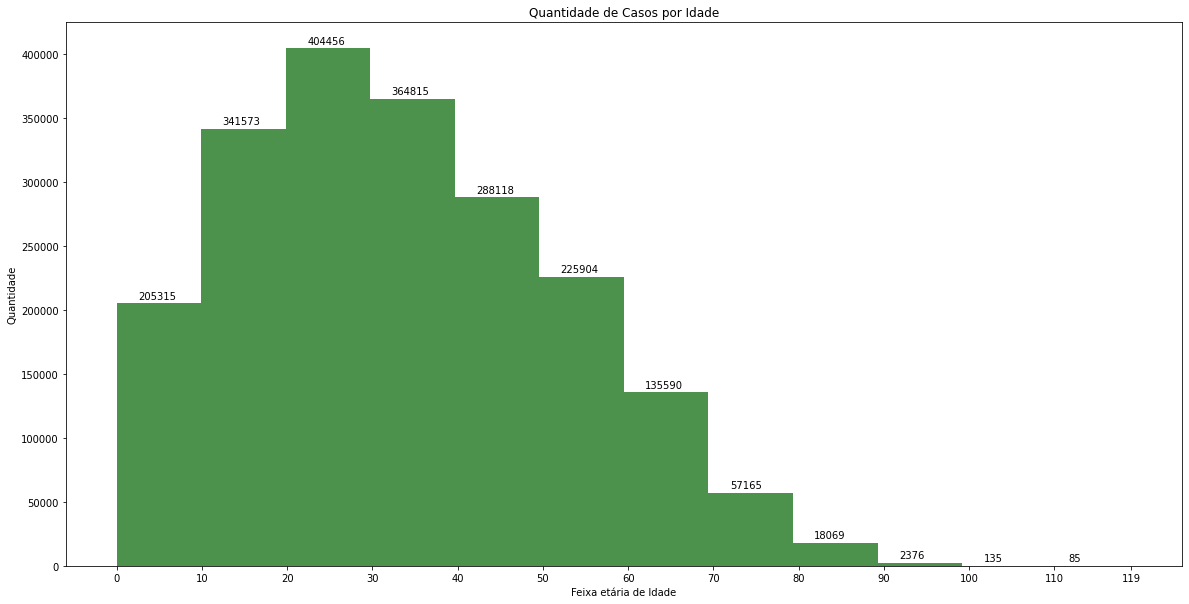

In [25]:
#Tratamento Dados

idade = pd.DataFrame(df, columns= ['dt_notific', 'dt_nasc','cs_sexo' ])
idade = idade.apply(lambda x: x.replace('None', np.nan))
idade.dropna(inplace=True)

idade['dt_notific'] = pd.to_datetime(idade['dt_notific'], format='%Y-%m-%d')
idade['dt_nasc'] = pd.to_datetime(idade['dt_nasc'], format='%Y-%m-%d')
idade['dias_de_vida'] = (idade['dt_notific'] - idade['dt_nasc']).dt.days
idade['idade'] = (idade['dias_de_vida'] / 365).astype(int)
idade['contagem'] = 1


plot_idade = idade['idade'].hist(bins=12, color='darkgreen', alpha=.7, figsize=(20,10), grid=False)

for p in plot_idade.patches:
  b=p.get_bbox()
  plot_idade.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 2.5, p.get_height()+3500))


plt.xlabel('Feixa etária de Idade')
plt.ylabel('Quantidade')

plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,119])
plt.title('Quantidade de Casos por Idade')
plt.show()



##Quantidade de casos por faixa etária do sexo Masculino:



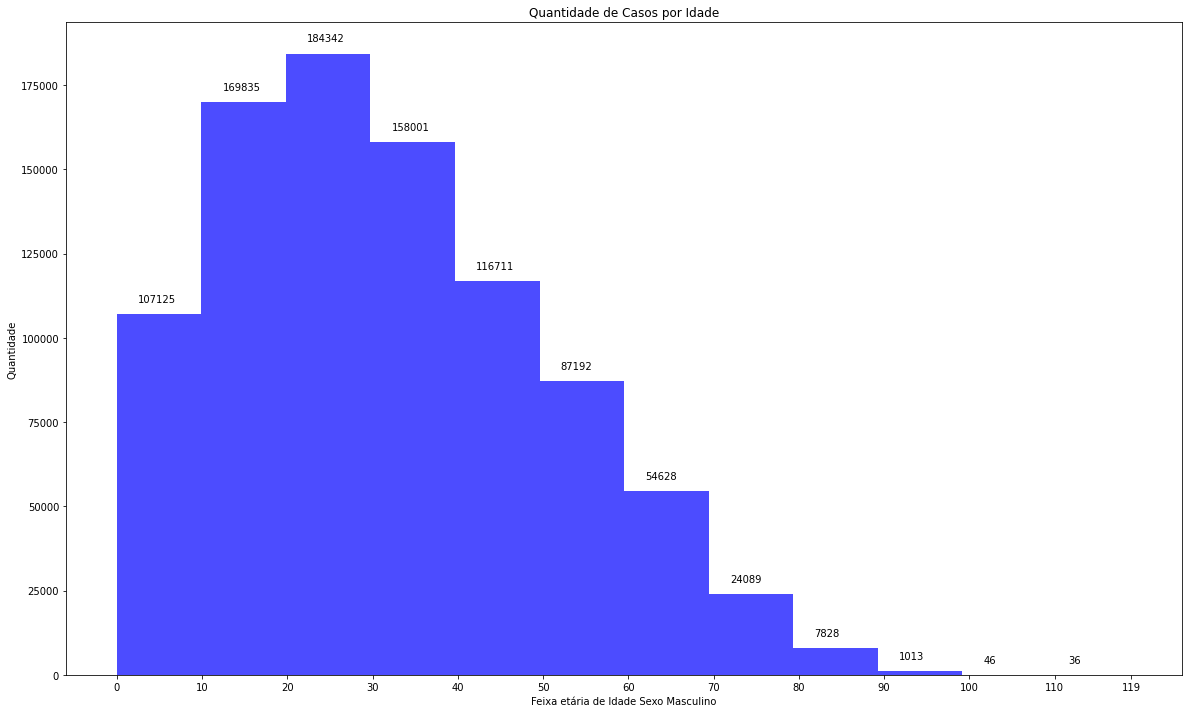

In [26]:
idade_masc = idade.query("cs_sexo == 'M'")

plot_idade_masc = idade_masc['idade'].hist(bins=12, color='blue', alpha=.7, figsize=(20,12), grid=False)

for p in plot_idade_masc.patches:
  b=p.get_bbox()
  plot_idade_masc.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 2.5, p.get_height()+3500))


plt.xlabel('Feixa etária de Idade Sexo Masculino')
plt.ylabel('Quantidade')

plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,119])
plt.title('Quantidade de Casos por Idade')
plt.show()


##Quantidade de casos por faixa etária do sexo Feminino:




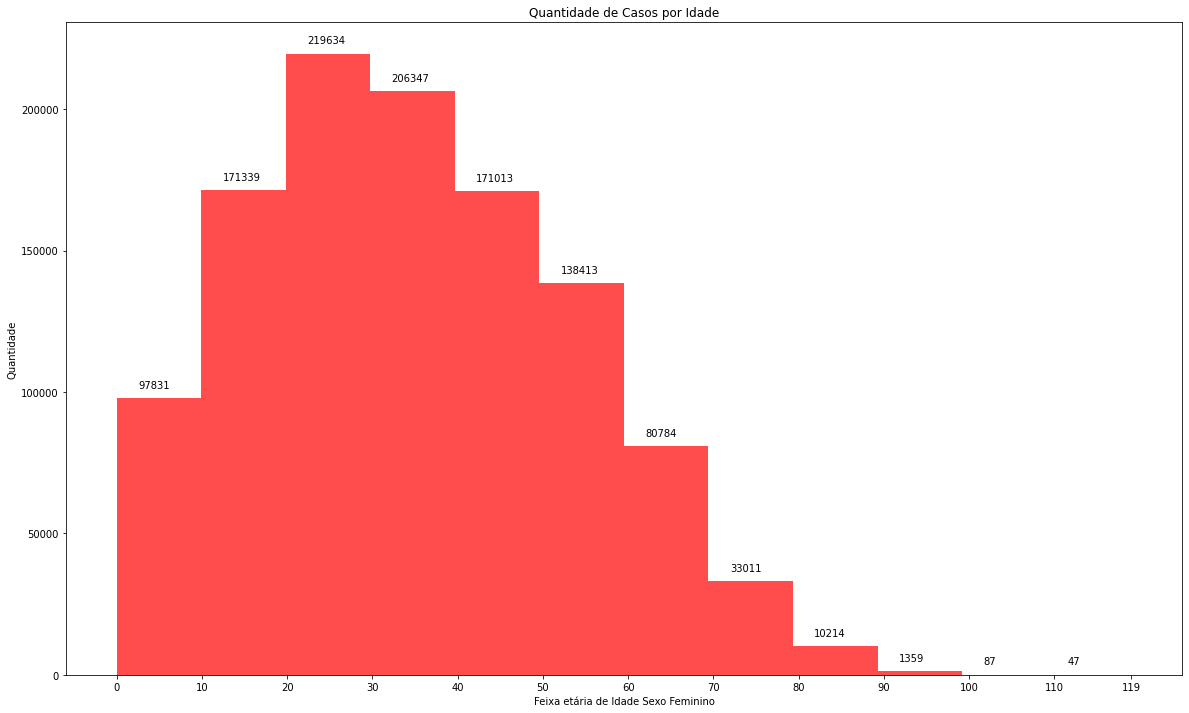

In [27]:
idade_fem = idade.query("cs_sexo == 'F'")
idade_fem

plot_idade_fem = idade_fem['idade'].hist(bins=12, color='red', alpha=.7, figsize=(20,12), grid=False)

for p in plot_idade_fem.patches:
  b=p.get_bbox()
  plot_idade_fem.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 2.5, p.get_height()+3500))


plt.xlabel('Feixa etária de Idade Sexo Feminino')
plt.ylabel('Quantidade')

plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,119])
plt.title('Quantidade de Casos por Idade')
plt.show()


# Quantidade de casos por UF e Prevalencia de cada estado





In [28]:
# Tratamento de dados #

aux_contagem_uf = pd.DataFrame(df, columns= ['sg_uf_not'])
aux_contagem_uf = aux_contagem_uf['sg_uf_not'].value_counts().to_frame().reset_index()
contagem_por_uf = aux_contagem_uf.set_index('index').join(uf.set_index('Código da UF'))
contagem_por_uf.columns = ['TotalInfectados', 'UF', 'Nome do Estado']

#Final Tratamento#

#Tratando DataFrame Estados Renomeando Colunas e removendo Coluna Estado
estados.columns = ['Codigo', 'Estado', 'TotalPopulacao','PopulacaoRural', 'PopulacaoUrbana']

estados = estados.drop(0)
estados = estados.drop(columns=['Estado','PopulacaoRural','PopulacaoUrbana'])



In [29]:
# contagem_por_uf
prevalenciaEstado = contagem_por_uf.merge(estados, left_on='index', right_on='Codigo')
prevalenciaEstado['Prevalencia'] = ((prevalenciaEstado['TotalInfectados'] / prevalenciaEstado['TotalPopulacao']) * 50000).astype(int)

prevalenciaEstado = prevalenciaEstado.sort_values('Prevalencia', ascending=False)
prevalenciaEstado

,TotalInfectados,UF,Nome do Estado,Codigo,TotalPopulacao,Prevalencia
1,595778,MG,Minas Gerais,31,19597330,1520
6,57040,MS,Mato Grosso do Sul,50,2449024,1164
2,138968,GO,Goiás,52,6003788,1157
4,75377,ES,Espírito Santo,32,3514952,1072
12,29130,TO,Tocantins,17,1383445,1052
9,43137,DF,Distrito Federal,53,2570160,839
0,673929,SP,São Paulo,35,41262199,816
17,9416,AC,Acre,12,733559,641
10,35807,RN,Rio Grande do Norte,24,3168027,565
3,93202,PR,Paraná,41,10444526,446


# Quantidade de casos por Municípios (SP)

In [30]:
#DataFrame da quantidade de casos de SP
qtd_municipio = pd.DataFrame(df, columns= ['id_municip' , 'sg_uf_not'])
qtd_sp = qtd_municipio.query('sg_uf_not == 35')
aux_contagem = qtd_sp["id_municip"].value_counts().to_frame().reset_index()
aux_contagem.columns = ["id_municipio", "TotalInfectados"]
aux_contagem['id_municipio'] = aux_contagem['id_municipio'].astype(str)

#DataFrame dos nomes e códigos dos municipios do brasil
municipios.columns = ["Codigo","NomeCidades","TotalPopulacao"]


municipios['Codigo'] = municipios['Codigo'].astype(str)
municipios.Codigo = municipios.Codigo.str[0:6]


# Criado o DataFrame da quantidade de casos por cidade, unindo o nome delas.
qtd_casos_sp = aux_contagem.join(municipios.set_index('Codigo'), on='id_municipio')

#Fazendo a normalização da quantidade de casos de dengue
qtd_casos_sp['prevalencia'] = ((qtd_casos_sp['TotalInfectados'] / qtd_casos_sp['TotalPopulacao']) * 50000)
qtd_casos_sp['prevalencia'] = qtd_casos_sp['prevalencia'].astype(int)


# Mapa Estado De São Paulo


In [31]:
ordernado_por_prevalencia = qtd_casos_sp.sort_values('prevalencia', ascending=False)
ordernado_por_prevalencia

,id_municipio,TotalInfectados,NomeCidades,TotalPopulacao,prevalencia
124,353420,805,Orindiúva,5675,7092
156,352950,651,Mendonça,4640,7015
22,354940,6161,São Joaquim da Barra,46512,6623
238,354030,322,Pontes Gestal,2518,6393
4,350320,26639,Araraquara,208662,6383
...,...,...,...,...,...
622,353230,1,Natividade da Serra,6678,7
599,350970,6,Campos do Jordão,47789,6
619,353820,1,Pinhalzinho,13105,3
620,354300,1,Ribeirão Branco,18269,2


In [32]:
#tratando os codigos do municipio para ficarem com 6 digitos
sp['CD_GEOCMU'] = sp['CD_GEOCMU'].astype(str)
sp.CD_GEOCMU = sp.CD_GEOCMU.str[0:6]


# #unindo os dois dataframes
sp_totalizado = pd.merge(qtd_casos_sp,sp, how='left', left_on='id_municipio', right_on='CD_GEOCMU')

# #removendo coluna duplicada
sp_totalizado = sp_totalizado.drop(columns=['CD_GEOCMU','NomeCidades'])

#convertendo para geodataframe
sp_totalizado = gpd.GeoDataFrame(sp_totalizado)

#criando o plot
sp_totalizado.plot(column='prevalencia',cmap='OrRd',figsize=(15,8),legend=True,edgecolor="black", scheme='quantiles', k=3)


NameError: ignored

## Destacando top5 cidades no grafico

In [ ]:
top5 = ordernado_por_prevalencia[0:5]
top5 = pd.merge(top5,sp, how='left', left_on='id_municipio', right_on='CD_GEOCMU')

cidadestop5 = gpd.GeoDataFrame(top5)

base = sp.plot(color='white', edgecolor='black', figsize=(20,12))

cidadestop5.plot(ax=base, edgecolor='orange')

# Caracterização Cidades TOP 5 São Paulo (Por Indicador)

In [33]:
#Arquivos de Caracterização para dataFrame

df_escolaridade = pd.DataFrame(escolaridade)
df_habitacao = pd.DataFrame(habitacao)
df_pop_feminina = pd.DataFrame(pop_feminina)
df_pop_masculina = pd.DataFrame(pop_masculina)
df_pop_total = pd.DataFrame(pop_total)
df_renda = pd.DataFrame(renda)

## Escolaridade


In [34]:
df_escolaridade.drop(columns = 'Código', inplace = True)
df_pivotado = pd.pivot_table(df_escolaridade, values = df_escolaridade.columns,columns='Espacialidades')
df_pivotado = df_pivotado[['Araraquara','Pontes Gestal','São Joaquim da Barra', 'Mendonça','Orindiúva','São Paulo', 'Brasil', ]]


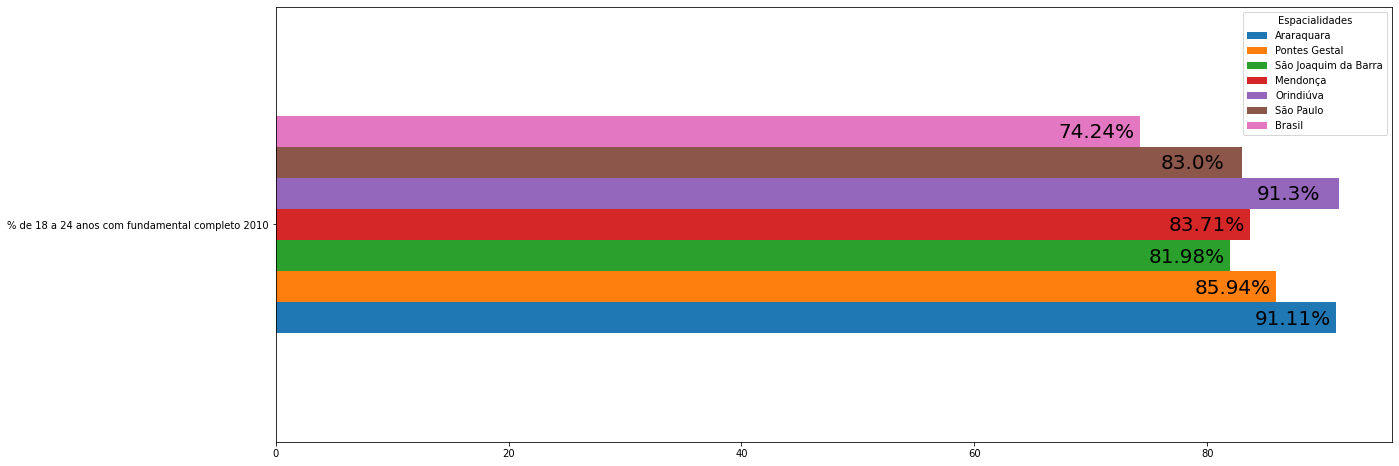

In [35]:
plot_escolaridade_1 = df_pivotado.loc[[
'% de 18 a 24 anos com fundamental completo 2010',
]]

plot = plot_escolaridade_1.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 7, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

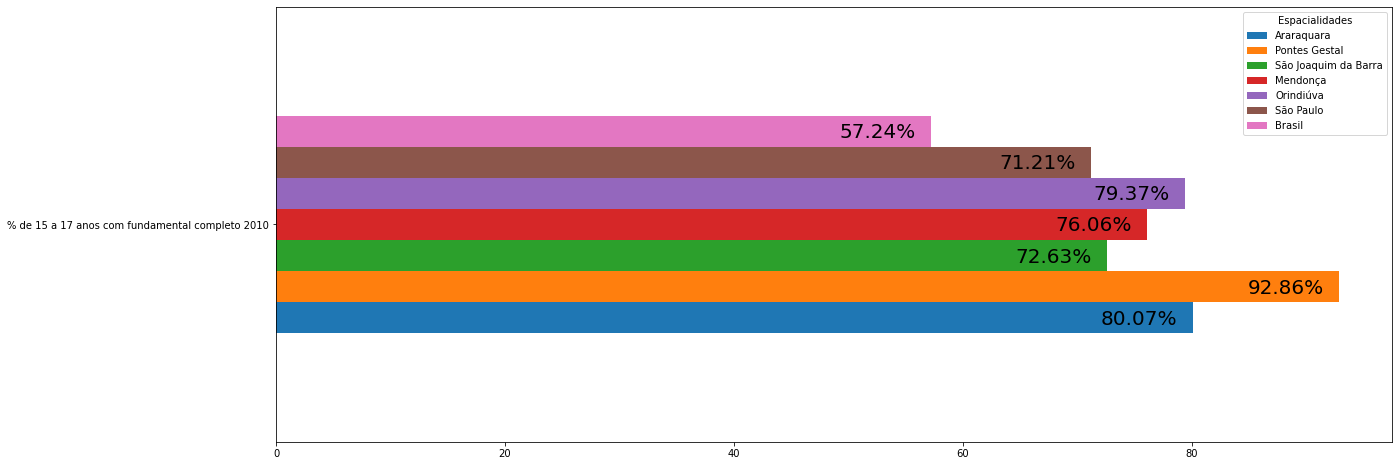

In [36]:
plot_escolaridade_2 = df_pivotado.loc[[
'% de 15 a 17 anos com fundamental completo 2010',
]]
plot = plot_escolaridade_2.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 8, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )


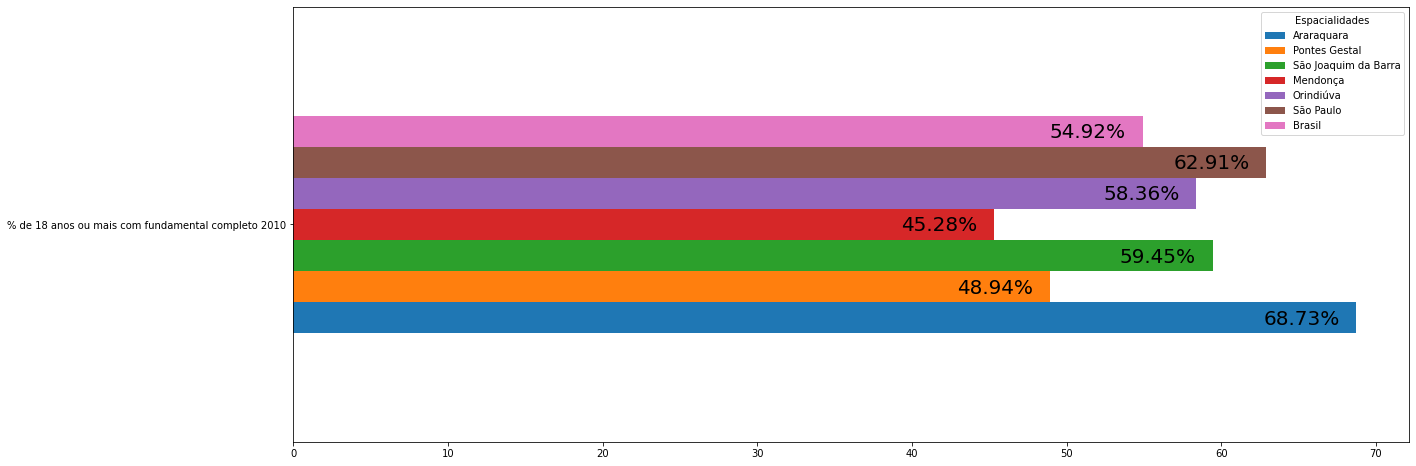

In [37]:
plot_escolaridade_3 = df_pivotado.loc[[
'% de 18 anos ou mais com fundamental completo 2010',]]
plot = plot_escolaridade_3.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 6, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )


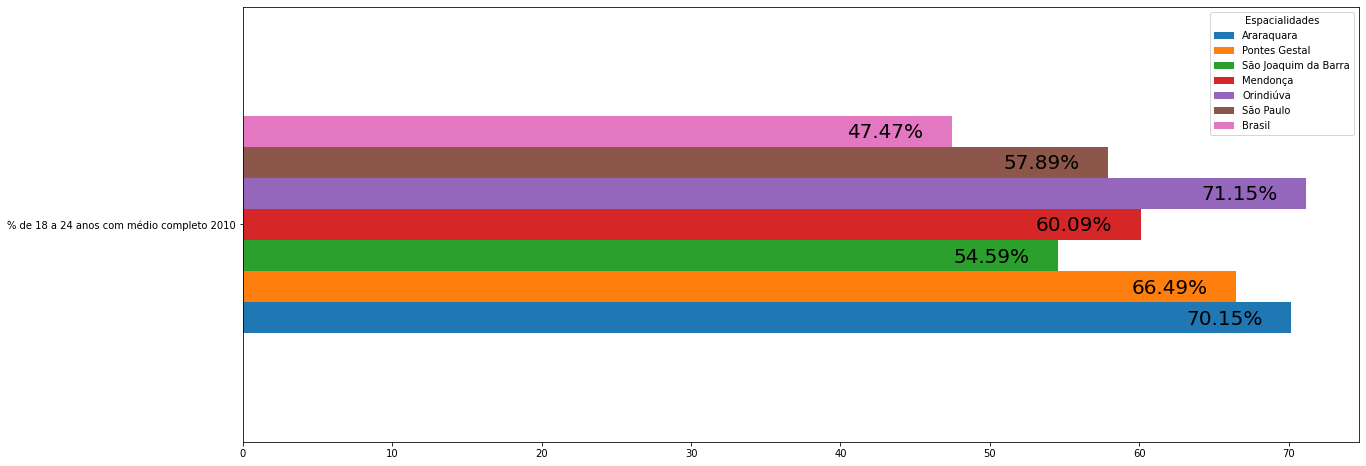

In [38]:
plot_escolaridade_4 = df_pivotado.loc[[
'% de 18 a 24 anos com médio completo 2010',]]
plot = plot_escolaridade_4.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 7, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

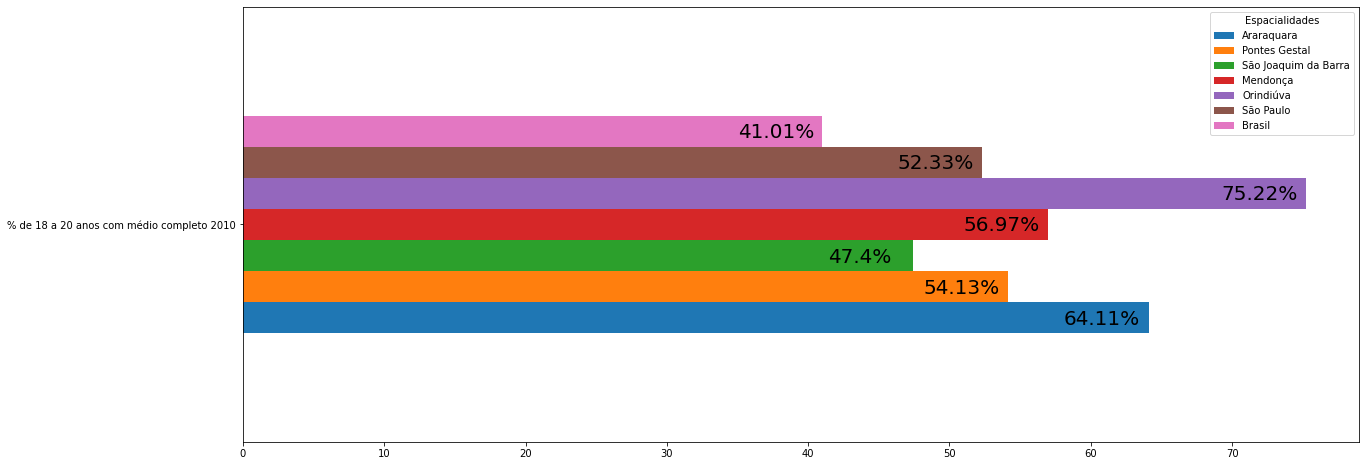

In [39]:
plot_escolaridade_5 = df_pivotado.loc[[
'% de 18 a 20 anos com médio completo 2010',]]
plot = plot_escolaridade_5.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 6, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

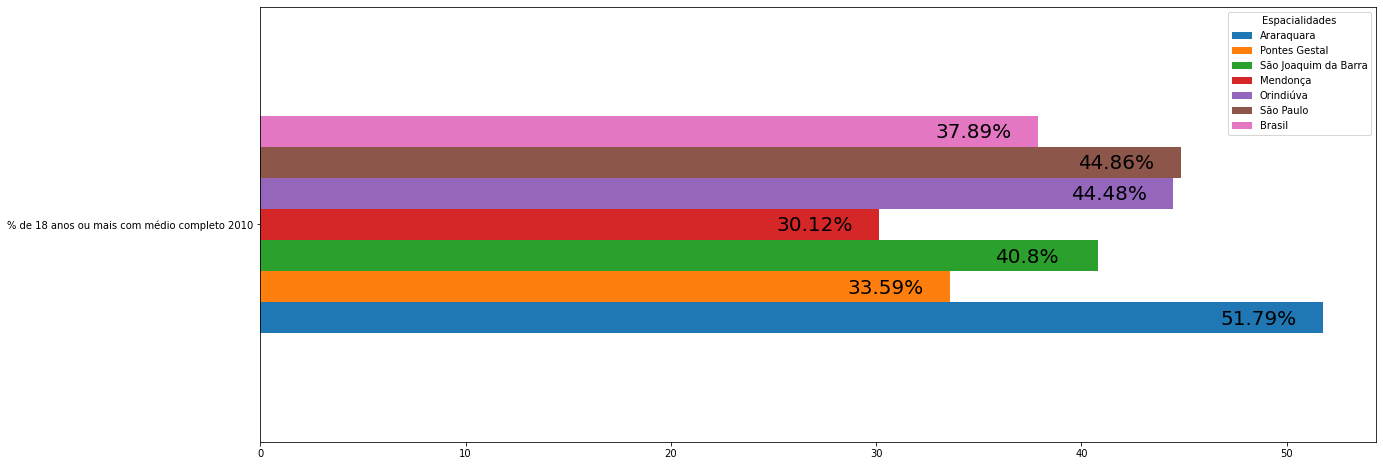

In [40]:
plot_escolaridade_6 = df_pivotado.loc[['% de 18 anos ou mais com médio completo 2010']]
plot = plot_escolaridade_6.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 5, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

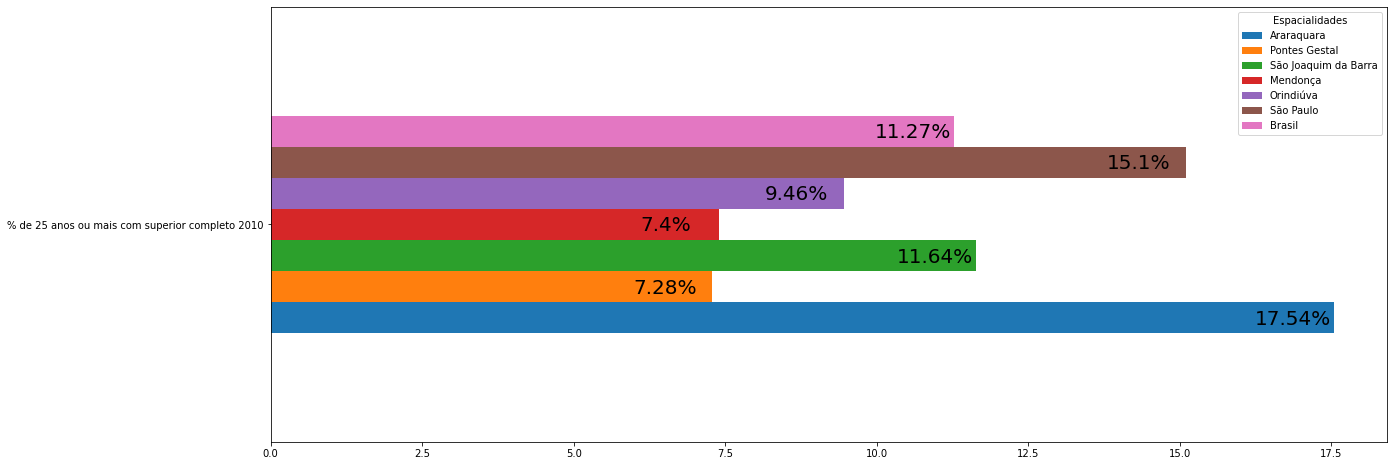

In [41]:
plot_escolaridade_7 = df_pivotado.loc[['% de 25 anos ou mais com superior completo 2010']]
plot = plot_escolaridade_7.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 1.3, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_escolaridade_8 = df_pivotado.loc[['% de 25 anos ou mais com médio completo 2010']]
plot = plot_escolaridade_8.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 4, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_escolaridade_9 = df_pivotado.loc[['% de 25 anos ou mais com fundamental completo 2010']]
plot = plot_escolaridade_9.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 6, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_escolaridade_10 = df_pivotado.loc[['% dos ocupados com superior completo - 18 anos ou mais 2010']]
plot = plot_escolaridade_10.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 1.5, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_escolaridade_11 = df_pivotado.loc[['% dos ocupados com médio completo - 18 anos ou mais 2010']]
plot = plot_escolaridade_11.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 6, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_escolaridade_12 = df_pivotado.loc[['% dos ocupados com fundamental completo - 18 anos ou mais 2010']]
plot = plot_escolaridade_12.plot(kind = 'barh', figsize = (15,10))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 8, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

## Habitação

In [ ]:
# df_habitacao.drop(columns = 'Código', inplace = True)
df_pivotado_hab = pd.pivot_table(df_habitacao, values = df_habitacao.columns,columns='Espacialidades')
df_pivotado_hab = df_pivotado_hab[['Araraquara','Pontes Gestal','São Joaquim da Barra', 'Mendonça','Orindiúva','São Paulo', 'Brasil', ]]
df_pivotado_hab


In [ ]:
plot_habitacao_1 = df_pivotado_hab.loc[['% da população em domicílios com banheiro e água encanada 2010']]
plot = plot_habitacao_1.plot(kind = 'barh', figsize = (15,10))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 10, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_habitacao_2 = df_pivotado_hab.loc[['% da população em domicílios com coleta de lixo 2010']]
plot = plot_habitacao_2.plot(kind = 'barh', figsize = (15,10))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 10, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_habitacao_3 = df_pivotado_hab.loc[['% da população em domicílios com densidade > 2 2010']]
plot = plot_habitacao_3.plot(kind = 'barh', figsize = (20,8))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 2.5, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20,
    )

In [ ]:
plot_habitacao_4 = df_pivotado_hab.loc[['% da população em domicílios com banheiro e água encanada 2010']]
plot = plot_habitacao_4.plot(kind = 'barh', figsize = (15,10))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 10, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_habitacao_5 = df_pivotado_hab.loc[['% da população em domicílios com água encanada 2010']]
plot = plot_habitacao_5.plot(kind = 'barh', figsize = (15,10))

for patch in plot.patches:
    plot.text(
        patch.get_width() - 10, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

## População

In [ ]:
df_pop_feminina

In [ ]:
df_pop_feminina['0anos  - 9 anos'] = df_pop_feminina['População feminina de 0 a 4 anos 2010'] + df_pop_feminina['População feminina de 5 a 9 anos 2010']
df_pop_feminina['10anos  - 19 anos'] = df_pop_feminina['População feminina de 10 a 14 anos 2010'] + df_pop_feminina['População feminina de 15 a 19 anos 2010']
df_pop_feminina['20anos  - 29 anos'] = df_pop_feminina['População feminina de 20 a 24 anos 2010'] + df_pop_feminina['População feminina de 25 a 29 anos 2010']
df_pop_feminina['30anos  - 39 anos'] = df_pop_feminina['População feminina de 30 a 34 anos 2010'] + df_pop_feminina['População feminina de 35 a 39 anos 2010']
df_pop_feminina['40anos  - 49 anos'] = df_pop_feminina['População feminina de 40 a 44 anos 2010'] + df_pop_feminina['População feminina de 45 a 49 anos 2010']
df_pop_feminina['50anos  - 59 anos'] = df_pop_feminina['População feminina de 50 a 54 anos 2010'] + df_pop_feminina['População feminina de 55 a 59 anos 2010']
df_pop_feminina['60anos  - 69 anos'] = df_pop_feminina['População feminina de 60 a 64 anos 2010'] + df_pop_feminina['População feminina de 65 a 69 anos 2010']
df_pop_feminina['70anos  - ou mais'] = df_pop_feminina['População feminina de 70 a 74 anos 2010'] + df_pop_feminina['População feminina de 75 a 79 anos 2010'] + df_pop_feminina['População feminina com 80 anos e mais 2010']

df_pop_feminina

In [ ]:
df_pop_feminina.drop(['População feminina de 0 a 4 anos 2010',
       'População feminina de 5 a 9 anos 2010',
       'População feminina de 10 a 14 anos 2010',
       'População feminina de 15 a 19 anos 2010',
       'População feminina de 20 a 24 anos 2010',
       'População feminina de 25 a 29 anos 2010',
       'População feminina de 30 a 34 anos 2010',
       'População feminina de 35 a 39 anos 2010',
       'População feminina de 40 a 44 anos 2010',
       'População feminina de 45 a 49 anos 2010',
       'População feminina de 50 a 54 anos 2010',
       'População feminina de 55 a 59 anos 2010',
       'População feminina de 60 a 64 anos 2010',
       'População feminina de 65 a 69 anos 2010',
       'População feminina de 70 a 74 anos 2010',
       'População feminina de 75 a 79 anos 2010',
       'População feminina com 80 anos e mais 2010'], axis= 1 ,inplace=True)

df_pop_feminina

In [ ]:
df_pop_masculina

In [ ]:
df_pop_masculina['0anos  - 9 anos'] = df_pop_masculina['População masculina de 0 a 4 anos 2010'] + df_pop_masculina['População masculina de 5 a 9 anos 2010']
df_pop_masculina['10anos  - 19 anos'] = df_pop_masculina['População masculina de 10 a 14 anos 2010'] + df_pop_masculina['População masculina de 15 a 19 anos 2010']
df_pop_masculina['20anos  - 29 anos'] = df_pop_masculina['População masculina de 20 a 24 anos 2010'] + df_pop_masculina['População masculina de 25 a 29 anos 2010']
df_pop_masculina['30anos  - 39 anos'] = df_pop_masculina['População masculina de 30 a 34 anos 2010'] + df_pop_masculina['População masculina de 35 a 39 anos 2010']
df_pop_masculina['40anos  - 49 anos'] = df_pop_masculina['População masculina de 40 a 44 anos 2010'] + df_pop_masculina['População masculina de 45 a 49 anos 2010']
df_pop_masculina['50anos  - 59 anos'] = df_pop_masculina['População masculina de 50 a 54 anos 2010'] + df_pop_masculina['População masculina de 55 a 59 anos 2010']
df_pop_masculina['60anos  - 69 anos'] = df_pop_masculina['População masculina de 60 a 64 anos 2010'] + df_pop_masculina['População masculina de 65 a 69 anos 2010']
df_pop_masculina['70anos  - ou mais'] = df_pop_masculina['População masculina de 70 a 74 anos 2010'] + df_pop_masculina['População masculina de 75 a 79 anos 2010'] + df_pop_masculina['População masculina com 80 anos e mais 2010']

df_pop_masculina

In [ ]:
df_pop_masculina.drop(['População masculina de 0 a 4 anos 2010',
       'População masculina de 5 a 9 anos 2010',
       'População masculina de 10 a 14 anos 2010',
       'População masculina de 15 a 19 anos 2010',
       'População masculina de 20 a 24 anos 2010',
       'População masculina de 25 a 29 anos 2010',
       'População masculina de 30 a 34 anos 2010',
       'População masculina de 35 a 39 anos 2010',
       'População masculina de 40 a 44 anos 2010',
       'População masculina de 45 a 49 anos 2010',
       'População masculina de 50 a 54 anos 2010',
       'População masculina de 55 a 59 anos 2010',
       'População masculina de 60 a 64 anos 2010',
       'População masculina de 65 a 69 anos 2010',
       'População masculina de 70 a 74 anos 2010',
       'População masculina de 75 a 79 anos 2010',
       'População masculina com 80 anos e mais 2010'], axis= 1 ,inplace=True)

df_pop_masculina

In [ ]:
df_pop_total

##Renda


In [ ]:
# df_renda.drop(columns = 'Código', inplace = True)
df_pivotado_renda = pd.pivot_table(df_renda, values = df_renda.columns,columns='Espacialidades')
df_pivotado_renda = df_pivotado_renda[['Araraquara','Pontes Gestal','São Joaquim da Barra', 'Mendonça','Orindiúva','São Paulo', 'Brasil', ]]
df_pivotado_renda



In [ ]:
plot_renda_1 = df_pivotado_renda.loc[['% de crianças extremamente pobres 2010']]
plot = plot_renda_1.plot(kind = 'barh', figsize = (15,8))

for patch in plot.patches:
    plot.text(
        patch.get_width(), 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_renda_2 = df_pivotado_renda.loc[['% de extremamente pobres 2010']]
plot = plot_renda_2.plot(kind = 'barh', figsize = (15,10))

for patch in plot.patches:
    plot.text(
        patch.get_width(), 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_renda_3 = df_pivotado_renda.loc[['% de vulneráveis à pobreza 2010']]
plot = plot_renda_3.plot(kind = 'barh', figsize = (15,8))

for patch in plot.patches:
    plot.text(
        patch.get_width()-4, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_renda_3 = df_pivotado_renda.loc[['% de crianças pobres 2010']]
plot = plot_renda_3.plot(kind = 'barh', figsize = (20,6))

for patch in plot.patches:
    plot.text(
        patch.get_width()-2, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_renda_4 = df_pivotado_renda.loc[[ '% de pobres 2010']]
plot = plot_renda_4.plot(kind = 'barh', figsize = (20,6))

for patch in plot.patches:
    plot.text(
        patch.get_width()-1, 
        patch.get_y() + 0.02,
        f'{patch.get_width()}%',
        fontsize=20
    )

In [ ]:
plot_renda_5 = df_pivotado_renda.loc[['Renda per capita 2010']]

plot_renda_5 = plot_renda_5.plot(kind = 'barh', figsize = (15,8))

for patch in plot_renda_5.patches:
    plot_renda_5.text(
        patch.get_width()-150, 
        patch.get_y() + 0.02,
        f'R$: {patch.get_width()}',
        fontsize = 18
    )
